# Ted Talks Data Analysis

This project contains a detailed analysis of the information about all talks including number of views, number of comments, descriptions, speakers and titles.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

To access our dataset, we will have to download it first and list all the files within the dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/rounakbanik/ted-talks' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: herambhd
Your Kaggle Key: ········


 50%|████▉     | 6.00M/12.0M [00:00<00:00, 57.4MB/s]

100%|██████████| 12.0M/12.0M [00:00<00:00, 60.2MB/s]


The dataset has been downloaded and extracted.

In [4]:
data_dir = './ted-talks'

In [5]:
import os
os.listdir(data_dir)

['.ipynb_checkpoints', 'transcripts.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "ted-talks-data-analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "herambhd03/zeros-to-pandas-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/herambhd03/zeros-to-pandas-project


'https://jovian.ai/herambhd03/zeros-to-pandas-project'

## Data Preparation and Cleaning

The first step is to go through our data and clean it. In this step all the peculiar data values and missing data will be taken care of and the final data set to be analysed will be prepared.



In [10]:
import pandas as pd

In [11]:
ted_talks_raw_df = pd.read_csv('ted_main.csv')

In [12]:
ted_talks_raw_df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [13]:
ted_talks_raw_df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


It can be seen that the number of languages for certain entries are 0, which is not possible, hence we will be replacing these with the value 1. This is because these Ted Talks must be present in atleast 1 language.

In [14]:
ted_talks_raw_df.loc[ted_talks_raw_df['languages'] == 0, 'languages'] = 1
ted_talks_raw_df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.360000,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.468279,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,1.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [15]:
selected_columns = [ 
    #The number of first level comments made on the talk    
    'comments',
    #A blurb of what the talk is about
    'description',
    #The duration of the talk in seconds
    'duration',
    #The number of languages in which the talk is available
    'languages',
    #The official name of the TED Talk. Includes the title and the speaker.
    'name',
    #The ratings and reviews received
    'ratings',
    #Occupation of the Speaker
    'speaker_occupation',
    #Categories in which the Talk falls in
    'tags',
    #The number of views
    'views'
]

In [16]:
ted_talks_df = ted_talks_raw_df[selected_columns].copy()
ted_talks_df = ted_talks_df.set_index('name')
ted_talks_df

,comments,description,duration,languages,ratings,speaker_occupation,tags,views
name,,,,,,,,
Ken Robinson: Do schools kill creativity?,4553,Sir Ken Robinson makes an entertaining and pro...,1164,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",47227110
Al Gore: Averting the climate crisis,265,With the same humor and humanity he exuded in ...,977,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",3200520
David Pogue: Simplicity sells,124,New York Times columnist David Pogue takes aim...,1286,26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",1636292
Majora Carter: Greening the ghetto,200,"In an emotionally charged talk, MacArthur-winn...",1116,35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",1697550
Hans Rosling: The best stats you've ever seen,593,You've never seen data presented like this. Wi...,1190,48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",12005869
...,...,...,...,...,...,...,...,...
Duarte Geraldino: What we're missing in the debate about immigration,17,"Between 2008 and 2016, the United States depor...",476,4,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",Journalist,"['TED Residency', 'United States', 'community'...",450430
Armando Azua-Bustos: The most Martian place on Earth,6,How can you study Mars without a spaceship? He...,290,3,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",417470
Radhika Nagpal: What intelligent machines can learn from a school of fish,10,Science fiction visions of the future show us ...,651,1,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",375647


In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "herambhd03/zeros-to-pandas-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/herambhd03/zeros-to-pandas-project


'https://jovian.ai/herambhd03/zeros-to-pandas-project'

## Exploratory Analysis and Visualization

In this section we will mainly focus on the statistics and different relationships between the data in various columns using plots and charts.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Views

In [20]:
top_views = ted_talks_df.sort_values(by='views',ascending=False).head(20)
top_views[['views']]

,views
name,
Ken Robinson: Do schools kill creativity?,47227110
Amy Cuddy: Your body language may shape who you are,43155405
Simon Sinek: How great leaders inspire action,34309432
Brené Brown: The power of vulnerability,31168150
Mary Roach: 10 things you didn't know about orgasm,22270883
Julian Treasure: How to speak so that people want to listen,21594632
Jill Bolte Taylor: My stroke of insight,21190883
Tony Robbins: Why we do what we do,20685401
James Veitch: This is what happens when you reply to spam email,20475972


Let us visualize this data in the form of a bar graph, to understand the data better.

Text(0.5, 0, 'Views')

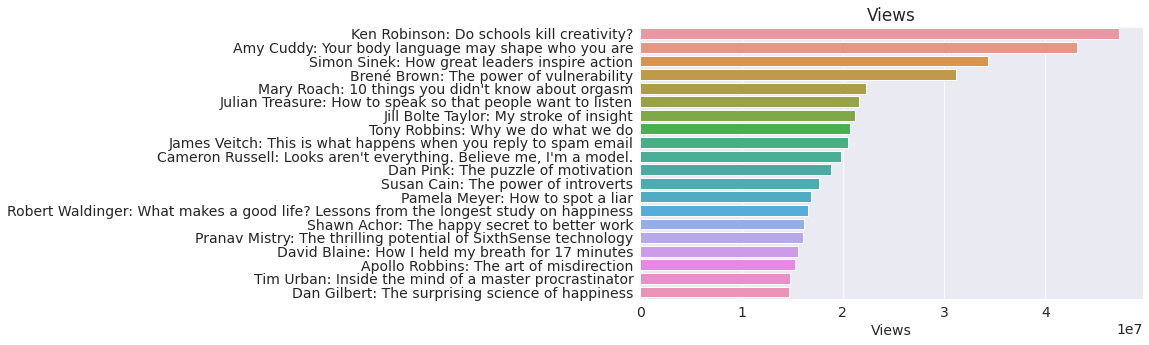

In [21]:
sns.barplot(x='views',y=top_views.index,data=top_views[['views']])
plt.title('Views')
plt.ylabel(None);
plt.xlabel('Views')

It appears that most viewers are interested in motivational and educational talks that focus mainly on self-improvement and happiness. These are great results for the Ted Talks as they were primarily meant to inspire and challenge audience members to think about challenging and creative topics from a different perspective. 

### Languages

Text(0, 0.5, 'Views')

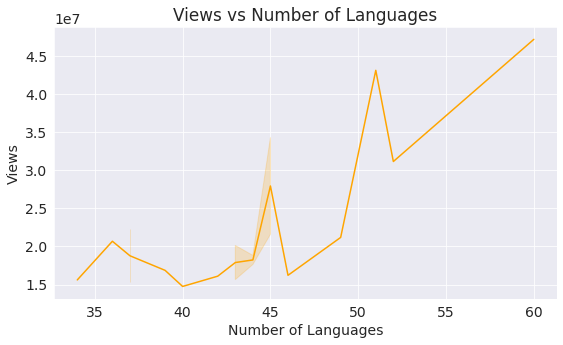

In [22]:
sns.lineplot(x='languages',y='views',data=top_views,color='orange')
plt.title('Views vs Number of Languages')
plt.xlabel('Number of Languages')
plt.ylabel('Views')

The general trend seems to be that the number of views of the Ted Talk increases with number of languages it is available in. But it is important to notice that there are a few cases where the number of views are high even when the number of languages it is spoken in is low. This may indicate that a majority of people speaking a particular language are interested in a particular topic of Ted Talks!

### Comments

In [23]:
most_comments = ted_talks_df.sort_values(by='comments',ascending=False).head(20)
most_comments[['comments']]

,comments
name,
Richard Dawkins: Militant atheism,6404
Ken Robinson: Do schools kill creativity?,4553
Sam Harris: Science can answer moral questions,3356
Jill Bolte Taylor: My stroke of insight,2877
David Chalmers: How do you explain consciousness?,2673
Janet Echelman: Taking imagination seriously,2492
Lesley Hazleton: On reading the Koran,2374
Amy Cuddy: Your body language may shape who you are,2290
Michael Specter: The danger of science denial,2272


Text(0.5, 0, 'Comments')

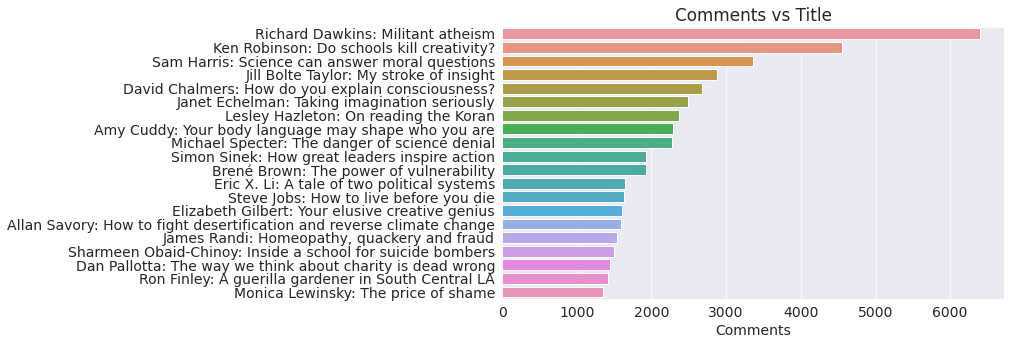

In [24]:
sns.barplot(x='comments',y=most_comments.index,data=most_comments[['comments']])
plt.title('Comments vs Title')
plt.ylabel(None);
plt.xlabel('Comments')

This shows us a very interesting result! All the topics for the above Ted Talks are either controversial topics or open questions which have resulted in a large number of comments where people would have put out their views and opinions. 

### Categories (Tags)

In [25]:
category = []
tagsstr=""
for tags in ted_talks_df.tags:
    tagsstr=""
    for ch in tags:
        if ch=='[' or ch==']':
            continue
        elif ch=='\'':
            continue
        else:
            tagsstr=tagsstr+ch
        tagstr=tagsstr.split(',')
    for name in top_views.index:
        for tag in tagstr:
            tag=tag.strip()
            if tag in name:
                category.append(tag)
df = pd.DataFrame(category,columns=['categories'])
df

,categories
0,creativity
1,technology
2,science
3,technology
4,motivation
...,...
2334,science
2335,art
2336,science
2337,science


In [26]:
category_count = df.categories.value_counts()
category_count

technology       727
science          567
art              221
creativity       189
happiness        146
life             111
potential         73
work              71
mind              71
motivation        63
language          59
sight             21
body language     11
introvert          5
vulnerability      4
Name: categories, dtype: int64

<AxesSubplot:>

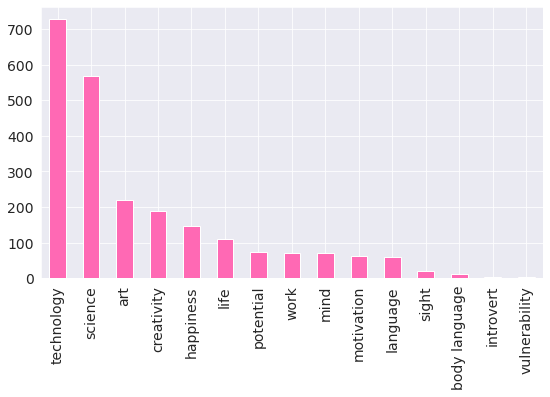

In [27]:
category_count.plot.bar(color='hotpink')

From the above graph it can be seen that the topics of technology, science and art have the majority of Ted Talks.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "herambhd03/zeros-to-pandas-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/herambhd03/zeros-to-pandas-project


'https://jovian.ai/herambhd03/zeros-to-pandas-project'

## Asking and Answering Questions

We will now answer some interesting questions based on the above data.



### Q1: What features make a Good Ted Talk?
Is it the number of comments? The number of languages? Or can it be the duration? Let's find out!

Text(0.5, 0, 'Views')

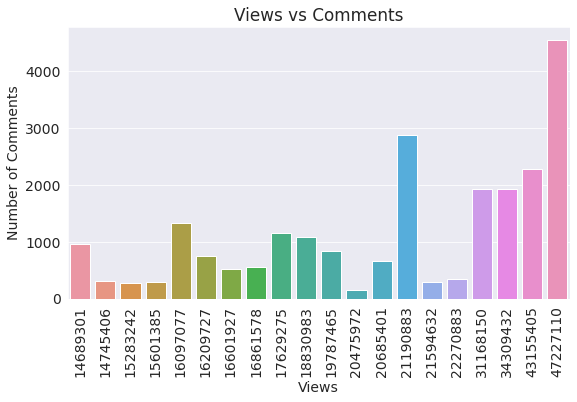

In [30]:
sns.barplot(x='views',y=top_views.comments,data=top_views)
y=top_views.comments
plt.xticks(rotation=90)
plt.title('Views vs Comments')
plt.ylabel('Number of Comments');
plt.xlabel('Views')


There seems to be a fair correlation between the number of comments and the number of views, though there are a few exceptions. Hence, we can conclude that the number of comments is a feature that indicates a good Ted Talk.

Text(0.5, 0, 'Views')

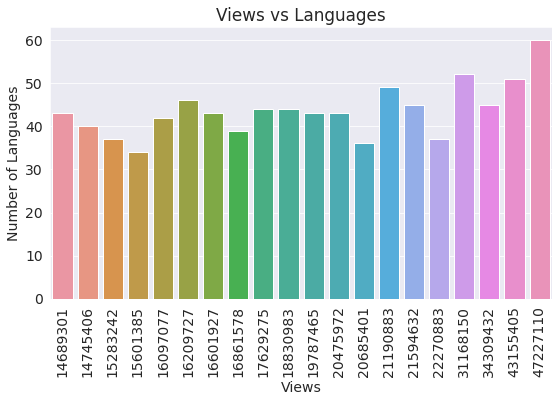

In [31]:
sns.barplot(x='views',y=top_views.languages,data=top_views)
y=top_views.comments
plt.xticks(rotation=90)
plt.title('Views vs Languages')
plt.ylabel('Number of Languages');
plt.xlabel('Views')


As the number of languages the Ted Talk is available in the number of views seems to increase (even by intuition this seems to be true).

Text(0.5, 0, 'Views')

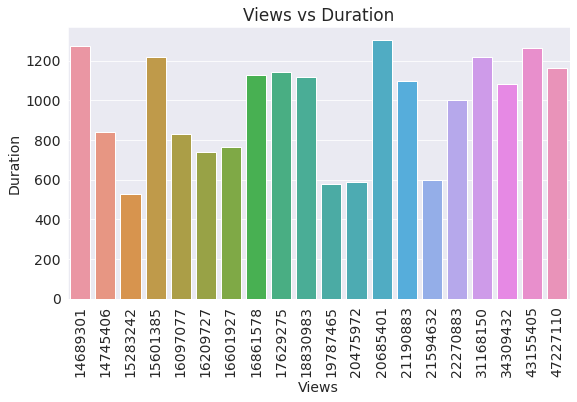

In [32]:
sns.barplot(x='views',y=top_views.duration,data=top_views)
y=top_views.comments
plt.xticks(rotation=90)
plt.title('Views vs Duration')
plt.ylabel('Duration');
plt.xlabel('Views')

There is no visible trend relating the duration with the number of views. Hence, duration is not a feature that makes a Ted Talk good.

### Q2: What kind of topics attract the maximum discussion and debate (in the form of comments)?

Text(0.5, 0, 'Comments')

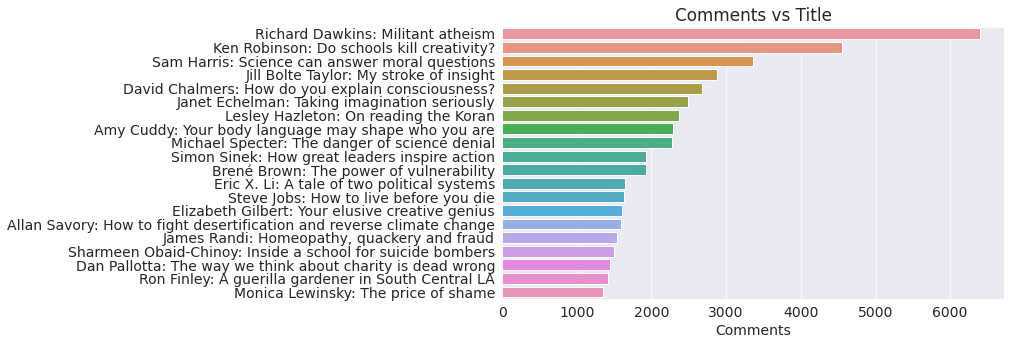

In [33]:
sns.barplot(x='comments',y=most_comments.index,data=most_comments[['comments']])
plt.title('Comments vs Title')
plt.ylabel(None);
plt.xlabel('Comments')

This shows that the Ted Talks about controversial topics and open-ended questions attract the maximum discussion and debate which can be inferred from the number of comments.

### Q3: Which themes are most popular amongst TEDsters?

<AxesSubplot:ylabel='categories'>

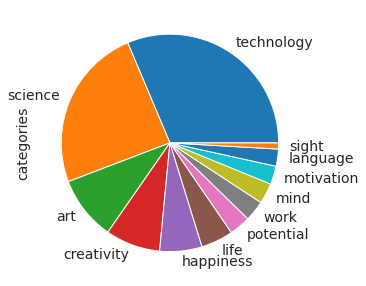

In [34]:
category_count[0:12].plot.pie()

This shows that the categories of science and technology are most sought after. That been said there are a wide-range of topics that also fascinate the community of Tedsters.

### Q4: What professional background are the speakers from?

In [35]:
top_views[['speaker_occupation']]

,speaker_occupation
name,
Ken Robinson: Do schools kill creativity?,Author/educator
Amy Cuddy: Your body language may shape who you are,Social psychologist
Simon Sinek: How great leaders inspire action,Leadership expert
Brené Brown: The power of vulnerability,Vulnerability researcher
Mary Roach: 10 things you didn't know about orgasm,Writer
Julian Treasure: How to speak so that people want to listen,Sound consultant
Jill Bolte Taylor: My stroke of insight,Neuroanatomist
Tony Robbins: Why we do what we do,Life coach; expert in leadership psychology
James Veitch: This is what happens when you reply to spam email,Comedian and writer


This signifies that the speakers come from a wide-range of professions and thus they represent a plethora of fields across the globe!

### Q5: What attributes make a Ted Talk amazing?

In [36]:
qualities = ['entertain','humor','funny','emotion','drama','motivate','motivating','inspire','inspiring','inspiration','technology','storytelling','powerful','interesting','curious']
for description in top_views.description:
    for quality in qualities:
        if quality in description:
            print(quality)

entertain
inspiration
powerful
funny
powerful
motivate
funny
inspire


Let us save and upload our work to Jovian before continuing.

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "herambhd03/zeros-to-pandas-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/herambhd03/zeros-to-pandas-project


'https://jovian.ai/herambhd03/zeros-to-pandas-project'

## Inferences and Conclusion

From the given dataset we can conclude that the popularity of a Ted Talk is dependent on the number of comments and the number of languages it is available in. Ted Talks mainly provide inspirational and educational content which helps individuals to look at things from a different perspective. There are a wide-variety of Ted Talks, ranging from technology to comedy.

In [39]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "herambhd03/zeros-to-pandas-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/herambhd03/zeros-to-pandas-project


'https://jovian.ai/herambhd03/zeros-to-pandas-project'

## References and Future Work

https://www.kaggle.com/rounakbanik/ted-talks

It would be great to work with Machine Learning on this data set to predict and classify the data and find various patterns!

In [41]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

In [ ]:
jovian.submit(assignment="zero-to-pandas-project")